# Computer Vision Morphological Transformations

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Dilation

In [38]:
# Create a simple 3 by 3 kernel of ones with numpy
kernel = np.ones((3,3),np.uint8)
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

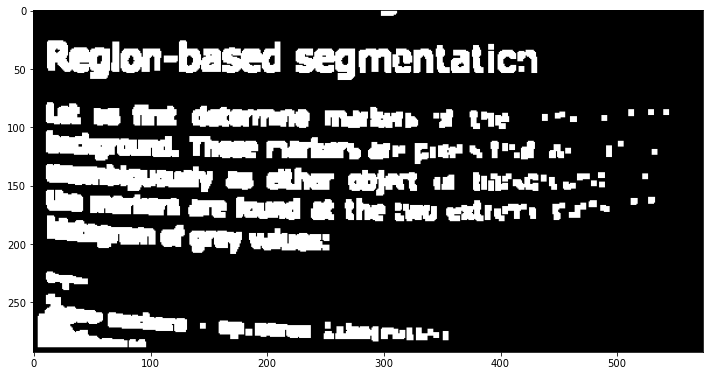

In [39]:
# Load an image, threshold it (binary_inverse) and apply dilation with openCV, try different number of iterations
text = cv2.imread('img/t1.png',0)
notes =cv2.imread('img/notes.png',0)
ret, th1 = cv2.threshold(text, 75, 255,cv2.THRESH_BINARY_INV)
ret1, otsu =cv2.threshold(text,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
th_2 = cv2.adaptiveThreshold(text,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,9)
dil_image =cv2.dilate(th1,kernel, iterations=2)


plt.figure(figsize = (12,10))
plt.imshow(dil_image,cmap='gray')

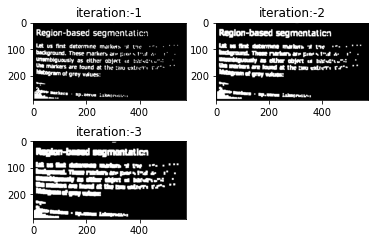

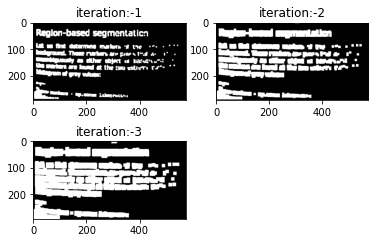

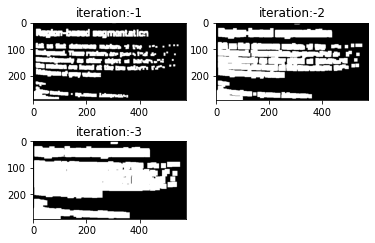

In [52]:
# Try with bigger kernels (5,5) and (7,7) or bigger and check what is the difference
kernel_1 =np.ones((5,5),dtype='uint8')
kernel_2 =np.ones((7,7),dtype='uint8')
kernels=[kernel,kernel_1,kernel_2]
image = text.copy()
iteration=[1,2,3]
ret, th = cv2.threshold(image, 75, 255,cv2.THRESH_BINARY_INV)
def dilation(image,kernel):
    for i in range(3):
        dil_image =cv2.dilate(image,kernel, iterations=iteration[i])
    #     plt.figure(figsize=(12,10))
        plt.subplot(2,2, i+1)
        plt.imshow(dil_image,cmap='gray')
        plt.title('iteration:-'+str(iteration[i]))
    plt.show()
    
dilation(th1,kernels[0])
dilation(th1,kernels[1])
dilation(th1,kernels[2]) 

[Hint](# "cv2.dilate") 

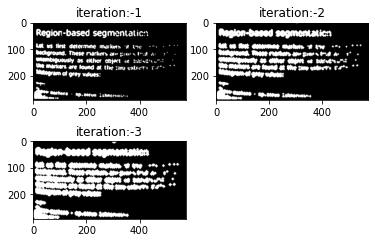

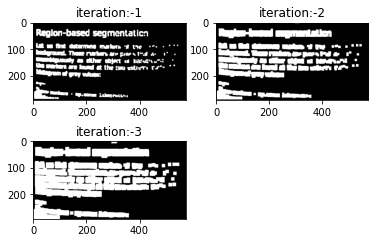

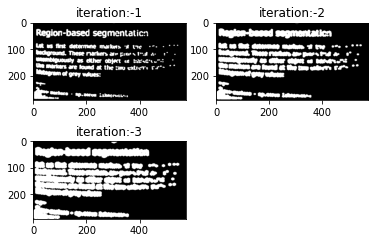

(None, None, None)

In [57]:
# Repeat the operation but this time create a special kernel with cv2.getStructuringElement, try different elements
# For example cv2.MORPH_RECT, cv2.MORPH_ELLIPSE and cv2.MORPH_CROSS, etc.
# Compare how the different kernels will affect the image
kernel_E1=cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
kernel_E2=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
kernel_E3=cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

dilation(th1,kernel_E3),dilation(th1,kernels[1]),dilation(th1,kernel_E2)

## Erosion

In [65]:
# Using the same kernels, apply Erosion to the thresholded image, make sure to start with a clean image
itera =[1,3,5]
def erosion(image,kernel):
    for i in range(3):
        erosion =cv2.erode(image,kernel,iterations=itera[i])
    #     plt.figure(figsize=(12,10))
        plt.subplot(2,2, i+1)
        plt.imshow(erosion,cmap='gray')
        plt.title('iteration:-'+str(itera[i]))
    plt.show()


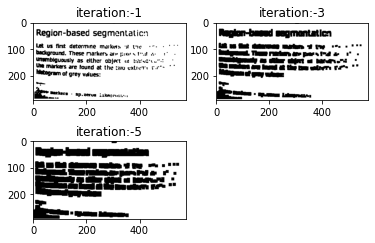

(None, <matplotlib.image.AxesImage at 0x2641ee82310>)

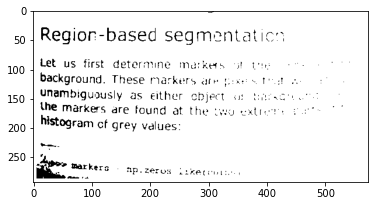

In [67]:
ret, th1 = cv2.threshold(text, 75, 255,cv2.THRESH_BINARY)
ker1=cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
erosion(th1,ker1),plt.imshow(th1,cmap='gray')

[Hint](# "cv2.erode") 

## Morphological Transformations: Opening / Closing

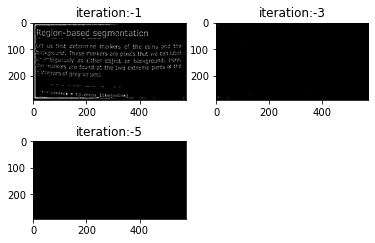

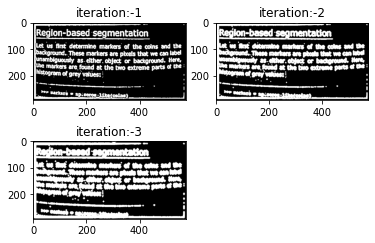

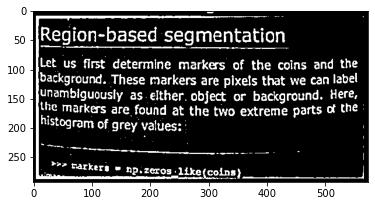

In [72]:
# Apply opening to the thresholded image, experiment with different iterations 
th_2 = cv2.adaptiveThreshold(text,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,11,9)
kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
erosion(th_2,kernel)
dilation(th_2,kernel)
plt.imshow(th_2,cmap='gray')

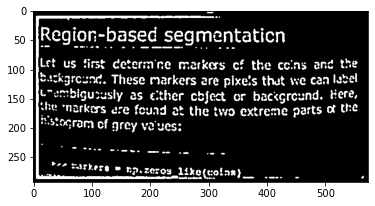

In [76]:
opening = cv2.morphologyEx(th_2,cv2.MORPH_OPEN, kernel)
plt.imshow(opening,cmap='gray')

[Hint](# "cv2.morphologyEx with cv2.MORPH_OPEN ") 

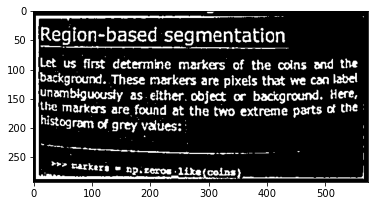

In [77]:
# Apply closing to the thresholded image, experiment with different iterations 
closing=cv2.morphologyEx(th_2,cv2.MORPH_CLOSE, kernel)
plt.imshow(closing,cmap='gray')

[Hint](# "cv2.morphologyEx with cv2.MORPH_CLOSE") 